In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from src.Graph import SingleGeneGraph
from src.Function import read_spatial_expression
from src import Preprocess
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def spatial_plot(adata, color, map = 'bwr'):
    sc.set_figure_params(facecolor="white", figsize=(8, 8))
    ax=sc.pl.scatter(adata,alpha=1,x="array_row",y="array_col", color = color, 
                 title=color,show=False,size=500000/adata.shape[0],
                 color_map=map,frameon=False)
    ax.set_aspect('equal', 'box')
    # ax.axes.invert_yaxis()

In [3]:
kneighbors, beta = 4,2
dataDir = "../dataset/MOB-breast_cancer/Rep11_MOB_count_matrix-1.tsv"
locs, data, _ = read_spatial_expression(dataDir)
locsDf = pd.DataFrame(locs, columns=["imagerow", "imagecol"])
locsDf.index = data.index
adata = sc.AnnData(X=data, obs=locsDf)
adata = Preprocess.data_preprocess(adata)
new_index = ["array_row", "array_col"]
adata.obs.rename(
    columns={"imagerow": new_index[0], "imagecol": new_index[1]}, inplace=True
)

raw data dim: (262, 16218)
Number of expressed genes a spot must have to be kept (0.01% of total expressed genes) 3375
Marked 3 spots
Removing genes that are expressed in less than 3 spots with a count of at least 1
Dropped 1559 genes


In [25]:
exp = adata.to_df()
coord = adata.obs[['array_row', 'array_col']]
targetGene= "Sparcl1"

In [26]:
geneGraph = SingleGeneGraph(targetGene, exp, coord, kneighbors, beta)

In [30]:
geneGraph.mrf_with_icmem(beta = 0)
# geneGraph.impute(alpha=0.6, theta = 0.2)

 10%|█         | 1/10 [00:00<00:00, 12.22it/s]

Convergence reached
[[ 0.59616907  0.26701641]
 [-1.16698573  0.36593603]]


In [31]:
label = geneGraph.label
adata.obs['label'] = label

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


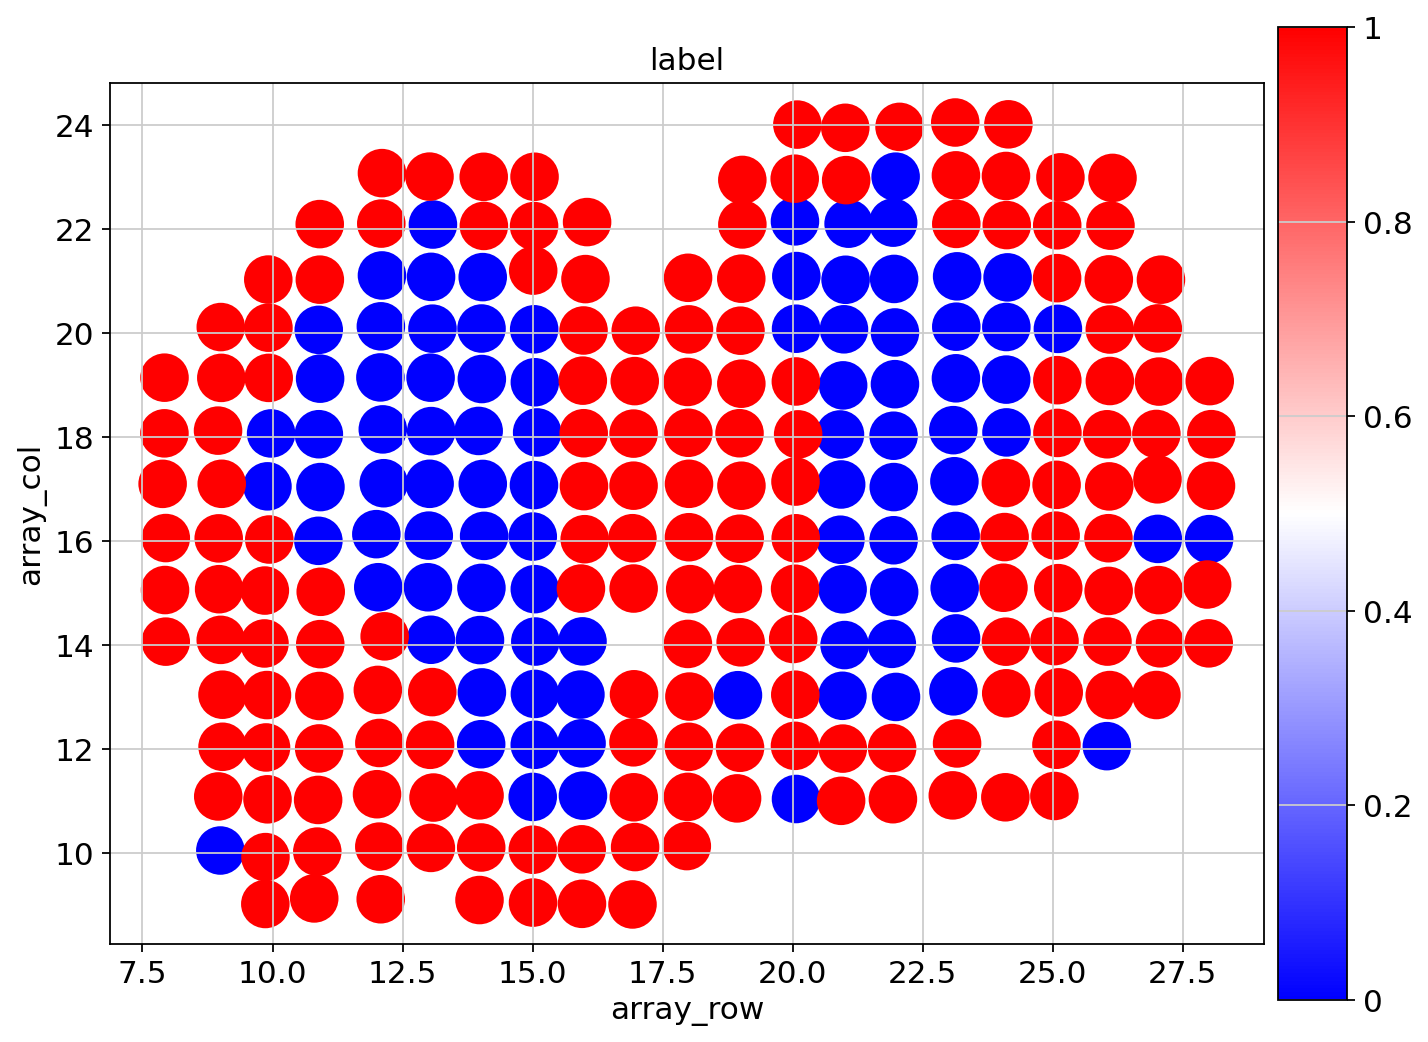

In [32]:
spatial_plot(adata, 'label')